- 이미지의 어느 부분이 CNN의 최종 분류 결정에 기여하는지
- 분류에 실수가 있는 경우 결정 과정을 디버깅한는 데 도움

In [1]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights = 'imagenet') #완전 연결 분류기까지 포함

553467904/553467096 [==============================] - 265s 0us/step


In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [3]:
img_path = './data/elephant.jpg'

img = image.load_img(img_path, target_size = (224,224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x) #color normailization

In [4]:
#surprised
preds = model.predict(x)
print('predicted : ', decode_predictions(preds, top = 3)[0]) #ImageNet dataset에 대한 예측 결과에서 상위 3개의 예측 클래스일 확률

40960/35363 [==================================] - 0s 5us/step
predicted :  [('n02504458', 'African_elephant', 0.9094213), ('n01871265', 'tusker', 0.08618258), ('n02504013', 'Indian_elephant', 0.004354576)]


In [6]:
preds.shape

(1, 1000)

In [8]:
np.argmax(preds[0]) #African_elephant idnex

386

# Grad-CAM
가장 아프리카 코끼리 같은 부위를 시각화

In [13]:
from keras import backend as K
import matplotlib.pyplot as plt

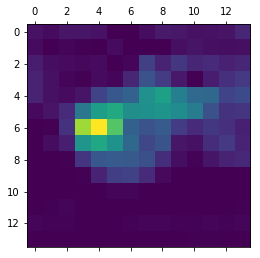

In [14]:
african_elephant_output = model.output[:,386]

last_conv_layer = model.get_layer('block5_conv3') #last layer
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis = (0,1,2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512) :
    conv_layer_output_value[:,:,i]*= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [15]:
import cv2

ImportError: No module named 'cv2'